# CO2 and GDP datasets Merging, Processing and EDA
This notebook merges and processes the GDP and CO2 countries' datasets contained in `..\data\processed`.

## Step 0: Import and Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

In [2]:
df_gdp = pd.read_csv('../data/processed//gdp_countries.csv')
df_co2_emissions = pd.read_csv('../data/processed/co2_emissions_countries.csv')

 ---

## Step 1: Data Preparation
Quick inspection

### 1.1 GDP Dataframe

In [3]:
# df_gdp.info()

In [4]:
df_gdp.head()

,Country Name,Country Code,Year,GDP,GDP per capita,GDP growth (annual %)
0,Afghanistan,AFG,2000,6.206548e+09,1617.826475,NaN
1,Afghanistan,AFG,2001,5.621148e+09,1454.110782,-9.431974
2,Afghanistan,AFG,2002,7.228796e+09,1774.308743,28.600001
3,Afghanistan,AFG,2003,7.867263e+09,1815.928200,8.832278
4,Afghanistan,AFG,2004,7.978516e+09,1776.918207,1.414118


### 1.2 CO2 emissions Dataframe

In [5]:
# df_co2_emissions.info()

In [6]:
df_co2_emissions.head()

,Entity,Code,Year,CO2 emissions per capita,Total CO2 emissions
0,Afghanistan,AFG,1949,0.001992,14656.0
1,Afghanistan,AFG,1950,0.010837,84272.0
2,Afghanistan,AFG,1951,0.011625,91600.0
3,Afghanistan,AFG,1952,0.011468,91600.0
4,Afghanistan,AFG,1953,0.013123,106256.0


 ---
### 1.3 Dataset merging
Merge the two datasets into `df_gdp_co2_merged`.

In [7]:
df_gdp_co2_merged = pd.merge(df_gdp, df_co2_emissions, 
                    left_on=['Country Code', 'Year'],
                    right_on=['Code', 'Year'],
                    how='inner',
                    suffixes=('_gdp', '_co2'))
df_gdp_co2_merged.info()

<class 'pandas.DataFrame'>
RangeIndex: 10949 entries, 0 to 10948
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              10949 non-null  str    
 1   Country Code              10949 non-null  str    
 2   Year                      10949 non-null  int64  
 3   GDP                       10868 non-null  float64
 4   GDP per capita            6658 non-null   float64
 5   GDP growth (annual %)     10759 non-null  float64
 6   Entity                    10949 non-null  str    
 7   Code                      10949 non-null  str    
 8   CO2 emissions per capita  10949 non-null  float64
 9   Total CO2 emissions       10949 non-null  float64
dtypes: float64(5), int64(1), str(4)
memory usage: 855.5 KB


In [8]:
df_gdp_co2_merged.head(10)

,Country Name,Country Code,Year,GDP,GDP per capita,GDP growth (annual %),Entity,Code,CO2 emissions per capita,Total CO2 emissions
0,Afghanistan,AFG,2000,6.206548e+09,1617.826475,NaN,Afghanistan,AFG,0.052017,1047127.94
1,Afghanistan,AFG,2001,5.621148e+09,1454.110782,-9.431974,Afghanistan,AFG,0.052706,1069098.00
2,Afghanistan,AFG,2002,7.228796e+09,1774.308743,28.600001,Afghanistan,AFG,0.062731,1341065.00
3,Afghanistan,AFG,2003,7.867263e+09,1815.928200,8.832278,Afghanistan,AFG,0.068608,1559679.00
4,Afghanistan,AFG,2004,7.978516e+09,1776.918207,1.414118,Afghanistan,AFG,0.052513,1237247.00
5,Afghanistan,AFG,2005,8.874480e+09,1908.114782,11.229715,Afghanistan,AFG,0.077424,1889507.00
6,Afghanistan,AFG,2006,9.349922e+09,1929.723897,5.357403,Afghanistan,AFG,0.084932,2159318.00
7,Afghanistan,AFG,2007,1.064267e+10,2155.353068,13.826320,Afghanistan,AFG,0.108063,2799909.00
8,Afghanistan,AFG,2008,1.106040e+10,2191.504356,3.924984,Afghanistan,AFG,0.160652,4254490.00
9,Afghanistan,AFG,2009,1.342627e+10,2565.022086,21.390528,Afghanistan,AFG,0.232586,6388232.00


Check country names

In [9]:
unique_country_names = df_gdp_co2_merged['Country Name'].unique()
unique_entity_names = df_gdp_co2_merged['Entity'].unique()

difference = list(set(unique_entity_names) - set(unique_country_names))
print("Entity Names that are not Country Names:", difference)

difference = list(set(unique_country_names) - set(unique_entity_names))
print("Country Names that are not Entity Names:", difference)


Entity Names that are not Country Names: ['Kyrgyzstan', 'South Korea', 'Brunei', 'Egypt', 'Syria', 'Bahamas', 'Gambia', 'Congo', 'Micronesia (country)', 'Saint Lucia', 'East Timor', 'Palestine', 'Saint Kitts and Nevis', 'Russia', 'Turkey', 'Vietnam', 'Democratic Republic of Congo', 'Somalia', 'Macao', 'Venezuela', 'Hong Kong', 'Yemen', 'Cape Verde', 'Iran', 'Slovakia', 'Saint Vincent and the Grenadines', 'Laos']
Country Names that are not Entity Names: ['Viet Nam', 'Turkiye', 'Cabo Verde', 'St. Kitts and Nevis', 'Timor-Leste', 'Slovak Republic', 'Yemen, Rep.', 'Bahamas, The', 'Kyrgyz Republic', 'Egypt, Arab Rep.', 'Macao SAR, China', 'Lao PDR', 'Russian Federation', 'Iran, Islamic Rep.', 'Korea, Rep.', 'Somalia, Fed. Rep.', 'St. Lucia', 'Venezuela, RB', 'Brunei Darussalam', 'Congo, Rep.', 'Hong Kong SAR, China', 'Syrian Arab Republic', 'West Bank and Gaza', 'Micronesia, Fed. Sts.', 'St. Vincent and the Grenadines', 'Congo, Dem. Rep.', 'Gambia, The']


Keep Entity names since they are cleaner

In [10]:
df_gdp_co2_merged.drop(columns=['Country Name', 'Code'], inplace=True)
df_gdp_co2_merged.rename(columns={'Entity': 'Country Name'}, inplace=True)
df_gdp_co2_merged.head(10)

,Country Code,Year,GDP,GDP per capita,GDP growth (annual %),Country Name,CO2 emissions per capita,Total CO2 emissions
0,AFG,2000,6.206548e+09,1617.826475,NaN,Afghanistan,0.052017,1047127.94
1,AFG,2001,5.621148e+09,1454.110782,-9.431974,Afghanistan,0.052706,1069098.00
2,AFG,2002,7.228796e+09,1774.308743,28.600001,Afghanistan,0.062731,1341065.00
3,AFG,2003,7.867263e+09,1815.928200,8.832278,Afghanistan,0.068608,1559679.00
4,AFG,2004,7.978516e+09,1776.918207,1.414118,Afghanistan,0.052513,1237247.00
5,AFG,2005,8.874480e+09,1908.114782,11.229715,Afghanistan,0.077424,1889507.00
6,AFG,2006,9.349922e+09,1929.723897,5.357403,Afghanistan,0.084932,2159318.00
7,AFG,2007,1.064267e+10,2155.353068,13.826320,Afghanistan,0.108063,2799909.00
8,AFG,2008,1.106040e+10,2191.504356,3.924984,Afghanistan,0.160652,4254490.00
9,AFG,2009,1.342627e+10,2565.022086,21.390528,Afghanistan,0.232586,6388232.00


Reorder columns

In [11]:
df_gdp_co2_merged.info()

<class 'pandas.DataFrame'>
RangeIndex: 10949 entries, 0 to 10948
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Code              10949 non-null  str    
 1   Year                      10949 non-null  int64  
 2   GDP                       10868 non-null  float64
 3   GDP per capita            6658 non-null   float64
 4   GDP growth (annual %)     10759 non-null  float64
 5   Country Name              10949 non-null  str    
 6   CO2 emissions per capita  10949 non-null  float64
 7   Total CO2 emissions       10949 non-null  float64
dtypes: float64(5), int64(1), str(2)
memory usage: 684.4 KB


In [12]:
df_gdp_co2_merged = df_gdp_co2_merged.loc[:, ['Country Name', 
                                              'Country Code', 
                                              'Year', 
                                              'Total CO2 emissions',
                                              'CO2 emissions per capita',
                                              'GDP', 
                                              'GDP per capita',
                                              'GDP growth (annual %)']]
df_gdp_co2_merged.head(10)

,Country Name,Country Code,Year,Total CO2 emissions,CO2 emissions per capita,GDP,GDP per capita,GDP growth (annual %)
0,Afghanistan,AFG,2000,1047127.94,0.052017,6.206548e+09,1617.826475,NaN
1,Afghanistan,AFG,2001,1069098.00,0.052706,5.621148e+09,1454.110782,-9.431974
2,Afghanistan,AFG,2002,1341065.00,0.062731,7.228796e+09,1774.308743,28.600001
3,Afghanistan,AFG,2003,1559679.00,0.068608,7.867263e+09,1815.928200,8.832278
4,Afghanistan,AFG,2004,1237247.00,0.052513,7.978516e+09,1776.918207,1.414118
5,Afghanistan,AFG,2005,1889507.00,0.077424,8.874480e+09,1908.114782,11.229715
6,Afghanistan,AFG,2006,2159318.00,0.084932,9.349922e+09,1929.723897,5.357403
7,Afghanistan,AFG,2007,2799909.00,0.108063,1.064267e+10,2155.353068,13.826320
8,Afghanistan,AFG,2008,4254490.00,0.160652,1.106040e+10,2191.504356,3.924984
9,Afghanistan,AFG,2009,6388232.00,0.232586,1.342627e+10,2565.022086,21.390528


 ---
## Step 3: Feature Understanding
Plotting correlations between GDP and CO2 emissions.

### 3.1 Correlation Heatmap
The heatmap allows to visualize how each variable interact. We can see that...

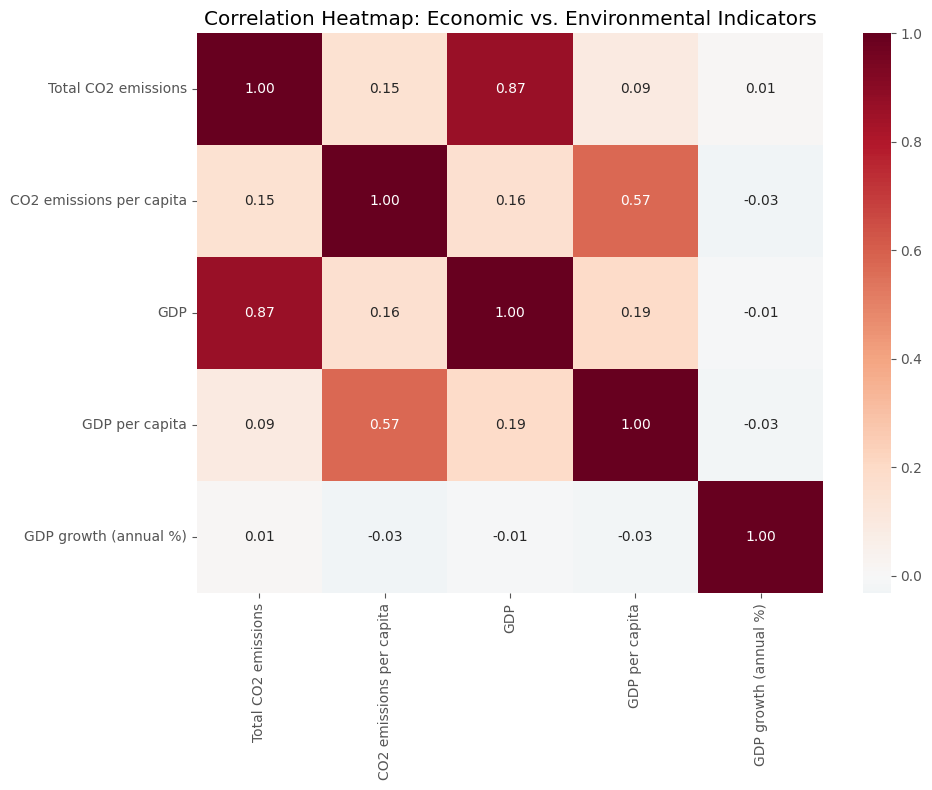

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numerical columns for correlation
numeric_cols = ['Total CO2 emissions', 'CO2 emissions per capita', 
                'GDP', 'GDP per capita', 'GDP growth (annual %)']

plt.figure(figsize=(10, 8))
correlation_matrix = df_gdp_co2_merged[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt=".2f")
plt.title('Correlation Heatmap: Economic vs. Environmental Indicators')
plt.tight_layout()
plt.savefig('../outputs/plots/correlation_heatmap_gdp_co2.png', dpi=300, bbox_inches='tight')
plt.show()

As expected, there is strong evidence (0.87 correlation) that the Total `GDP` and `Total CO2 emissions` are related, whereas, interestingly, `GDP per capita` and `CO2 per capita` correlation is more moderate (0.57 correlation). This means that individual wealth doesn't necessary lead to higher pollution, suggesting that technological or energetic differences between countries also play an important role.

It can also be seen that the annual growth of a country is not a good predictor for CO2 emissions (approx 0 correlation), therefore the _rate_ at which an economy grows in a single year doesn't have a significative environmental impact.

### 3.2 Scatter Plot (Standard Scale) 
The [Environmental Kuznets Curve (EKC)](https://en.wikipedia.org/wiki/Kuznets_curve) theory suggests that a developing country initially produce high emissions, they reach a peak, but then decline as the economy becomes more efficient. In a standard scatter plot this results in an inverted _U-shape_.

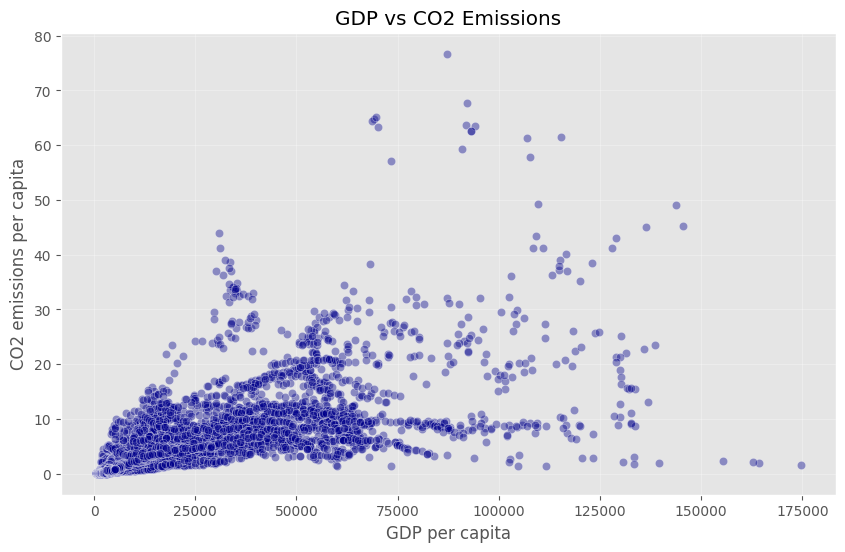

In [14]:
# remove outlier in CO2 emissions per capita (circa 350) for better visualization 
df_gdp_co2_merged_filtered = df_gdp_co2_merged[df_gdp_co2_merged['CO2 emissions per capita'] < 350]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_gdp_co2_merged_filtered, x='GDP per capita', 
                y='CO2 emissions per capita', alpha=0.4, color='darkblue')
plt.title('GDP vs CO2 Emissions')
plt.xlabel('GDP per capita')
plt.ylabel('CO2 emissions per capita')
plt.grid(True, alpha=0.3)
plt.savefig('../outputs/plots/gdp_vs_co2_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

The majority of data is concentrated in the bottom-left angle of the plot (low income, low emissions), although few countries with medium GDP per capita produce high CO2 emissions. 

According to EKC theory, we should see the upside-down _U-shape_ in the plot above, however, the data distribution only flattens and stabilize as the wealth grows. This doesn't actually confirm the EKC supposition of a net decline, nor shows a strong linear correlation between GDP and CO2 emissions.

Nonetheless, transforming the data into logarithmic scale could possibly help, as can be seen in the next cells.

### 3.3 Log Transformation and Linear Correlation
Transforming GDP per capita and CO2 emissions per capita to a logarithmic scale to reveal a strong linear correlation.

Linear Correlation in Log-Log space: 0.8984


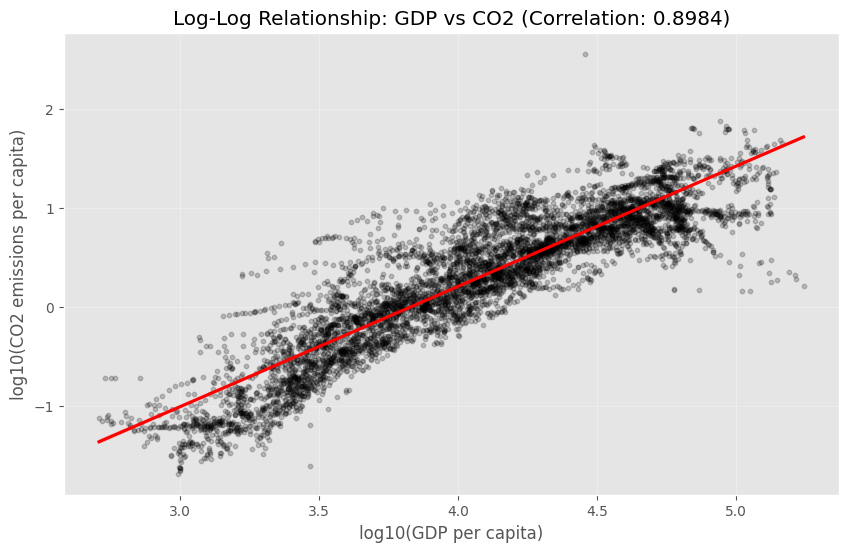

In [15]:
# Filter out zeros and NaNs to avoid errors with log transformation
df_log = df_gdp_co2_merged[(df_gdp_co2_merged['GDP per capita'] > 0) & 
                           (df_gdp_co2_merged['CO2 emissions per capita'] > 0)].copy()

df_log['log_GDP_pc'] = np.log10(df_log['GDP per capita'])
df_log['log_CO2_pc'] = np.log10(df_log['CO2 emissions per capita'])

pearson_coeff = df_log['log_GDP_pc'].corr(df_log['log_CO2_pc'])
print(f"Linear Correlation in Log-Log space: {pearson_coeff:.4f}")

plt.figure(figsize=(10, 6))
sns.regplot(data=df_log, x='log_GDP_pc', y='log_CO2_pc', color='black',
            scatter_kws={'alpha': 0.2, 's': 10}, line_kws={'color': 'red'})

plt.title(f'Log-Log Relationship: GDP vs CO2 (Correlation: {pearson_coeff:.4f})')
plt.xlabel('log10(GDP per capita)')
plt.ylabel('log10(CO2 emissions per capita)')
plt.grid(True, alpha=0.3)
plt.savefig('../outputs/plots/gdp_vs_co2_loglog.png', dpi=300, bbox_inches='tight')
plt.show()

Repeating for recent years to understand if the correlation is weakening

Linear Correlation in Log-Log space: 0.8991


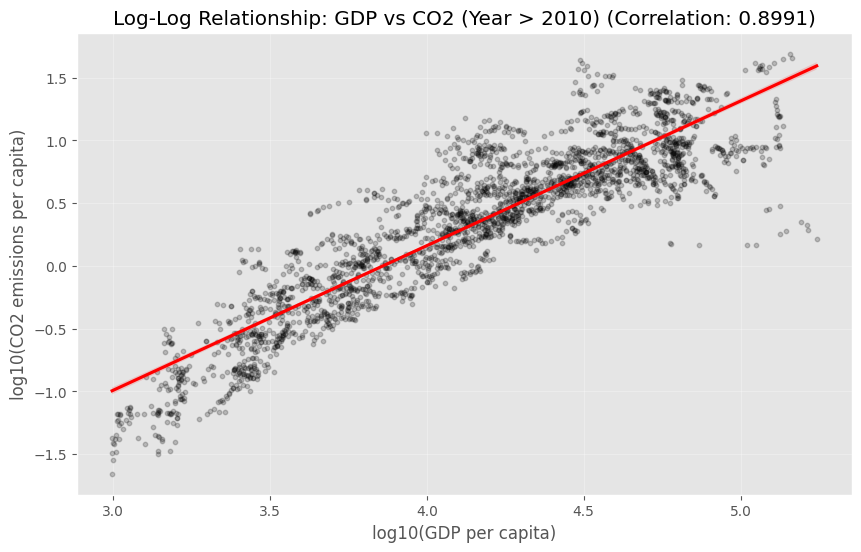

In [16]:
# Filter out zeros and NaNs to avoid errors with log transformation
df_log = df_gdp_co2_merged[(df_gdp_co2_merged['GDP per capita'] > 0) & 
                           (df_gdp_co2_merged['CO2 emissions per capita'] > 0)].copy()
df_log = df_log[df_log['Year'] > 2010]

df_log['log_GDP_pc'] = np.log10(df_log['GDP per capita'])
df_log['log_CO2_pc'] = np.log10(df_log['CO2 emissions per capita'])

pearson_coeff = df_log['log_GDP_pc'].corr(df_log['log_CO2_pc'])
print(f"Linear Correlation in Log-Log space: {pearson_coeff:.4f}")

plt.figure(figsize=(10, 6))
sns.regplot(data=df_log, x='log_GDP_pc', y='log_CO2_pc', color='black',
            scatter_kws={'alpha': 0.2, 's': 10}, line_kws={'color': 'red'})

plt.title(f'Log-Log Relationship: GDP vs CO2 (Year > 2010) (Correlation: {pearson_coeff:.4f})')
plt.xlabel('log10(GDP per capita)')
plt.ylabel('log10(CO2 emissions per capita)')
plt.grid(True, alpha=0.3)
plt.savefig('../outputs/plots/gdp_vs_co2_loglog_recent_years.png', dpi=300, bbox_inches='tight')
plt.show()

In both case, there is strong evidence (Pearson coefficient 0.89) that the GDP per capita and the CO2 emissions per capita are related, but also reject the hypothesis that the correlation is weakening in recent years.

 ---

### 3.4 Top-40 Economic Powers Analysis
Here a subset of the dataset is taken into account, addressing only the 40 most powerful economies in the World. 

In [17]:
df_gdp_co2_top40 = df_gdp_co2_merged[df_gdp_co2_merged['Year'] == 2024]
df_gdp_co2_top40 = df_gdp_co2_top40.sort_values(by='GDP', ascending=False).head(40)
df_gdp_co2_top40["Country Name"].unique()

<StringArray>
[       'United States',                'China',                'Japan',
              'Germany',                'India',       'United Kingdom',
               'France',                'Italy',               'Brazil',
          'South Korea',               'Canada',            'Australia',
               'Russia',                'Spain',               'Mexico',
               'Turkey',            'Indonesia',          'Netherlands',
         'Saudi Arabia',          'Switzerland',               'Poland',
            'Argentina',               'Sweden',              'Nigeria',
                 'Iran',              'Belgium',              'Ireland',
                'Egypt',             'Thailand', 'United Arab Emirates',
          'Philippines',               'Norway',             'Malaysia',
              'Austria',               'Israel',             'Pakistan',
            'Singapore',              'Vietnam',         'South Africa',
              'Denmark']
Length: 40, 

In [18]:
# dictionary mapping Country -> Continent
continent_map = {
    'United States': 'North America', 'Canada': 'North America', 'Mexico': 'North America',
    'China': 'Asia', 'Japan': 'Asia', 'India': 'Asia', 'South Korea': 'Asia', 
    'Indonesia': 'Asia', 'Saudi Arabia': 'Asia', 'Iran': 'Asia', 'Thailand': 'Asia', 
    'United Arab Emirates': 'Asia', 'Philippines': 'Asia', 'Malaysia': 'Asia', 
    'Israel': 'Asia', 'Pakistan': 'Asia', 'Singapore': 'Asia', 'Vietnam': 'Asia',
    'Germany': 'Europe', 'United Kingdom': 'Europe', 'France': 'Europe', 'Italy': 'Europe', 
    'Spain': 'Europe', 'Netherlands': 'Europe', 'Switzerland': 'Europe', 'Poland': 'Europe', 
    'Sweden': 'Europe', 'Belgium': 'Europe', 'Ireland': 'Europe', 'Norway': 'Europe', 
    'Austria': 'Europe', 'Denmark': 'Europe', 'Russia': 'Europe', # Russia è spesso considerata transcontinentale, ma solitamente raggruppata in Europe per GDP
    'Brazil': 'South America', 'Argentina': 'South America',
    'Australia': 'Oceania',
    'Nigeria': 'Africa', 'Egypt': 'Africa', 'South Africa': 'Africa', 'Turkey': 'Asia' # Turchia è transcontinentale, spesso inclusa in Asia o Europe
}

df_gdp_co2_top40['Continent'] = df_gdp_co2_top40['Country Name'].map(continent_map)
df_gdp_co2_top40[['Country Name', 'Continent']].head()

,Country Name,Continent
10503,United States,North America
2093,China,Asia
5161,Japan,Asia
3786,Germany,Europe
4647,India,Asia


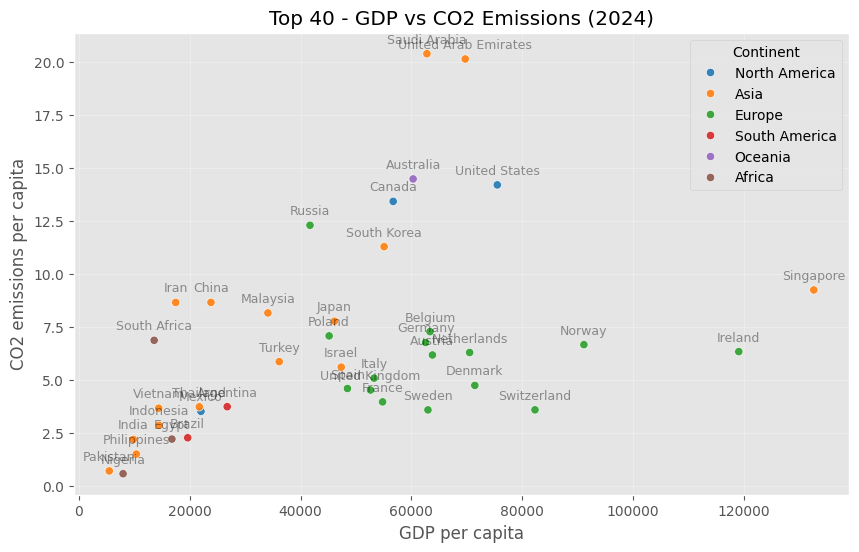

In [19]:
# remove outlier in CO2 emissions per capita (circa 350) for better visualization 
df_gdp_co2_top40 = df_gdp_co2_top40[df_gdp_co2_top40['CO2 emissions per capita'] < 350]


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_gdp_co2_top40, x='GDP per capita', 
                y='CO2 emissions per capita', alpha=0.9, hue='Continent', palette='tab10')

for i in range(df_gdp_co2_top40.shape[0]):
    plt.text(x=df_gdp_co2_top40['GDP per capita'].iloc[i], 
             y=df_gdp_co2_top40['CO2 emissions per capita'].iloc[i] + 0.5, # Offset leggero verso l'alto
             s=df_gdp_co2_top40['Country Name'].iloc[i], 
             fontsize=9, 
             alpha=0.4,
             ha='center') # Allineamento orizzontale al centro

plt.title('Top 40 - GDP vs CO2 Emissions (2024)')
plt.xlabel('GDP per capita')
plt.ylabel('CO2 emissions per capita')
plt.grid(True, alpha=0.3)
plt.savefig('../outputs/plots/gdp_vs_co2_top40_2024.png', dpi=300, bbox_inches='tight')
plt.show()

On the scatter plot above we can easily see that all the european countries present similar features, specifically by producing low emissions compared to their wealth.

It also shows that the asian countries are highly scattered across the plot, probably due to the very different economies and cultures of these countries, and less strong boundaries with respect to Europe.

UAE and Saudi Arabia are the outliers of this graph, since they produce the highest relative CO2 emissions. This could be explained by many factors, such as their oil-based economy, the extreme climate and energy consumption, etc...

Linear Correlation in Log-Log space: 0.6944


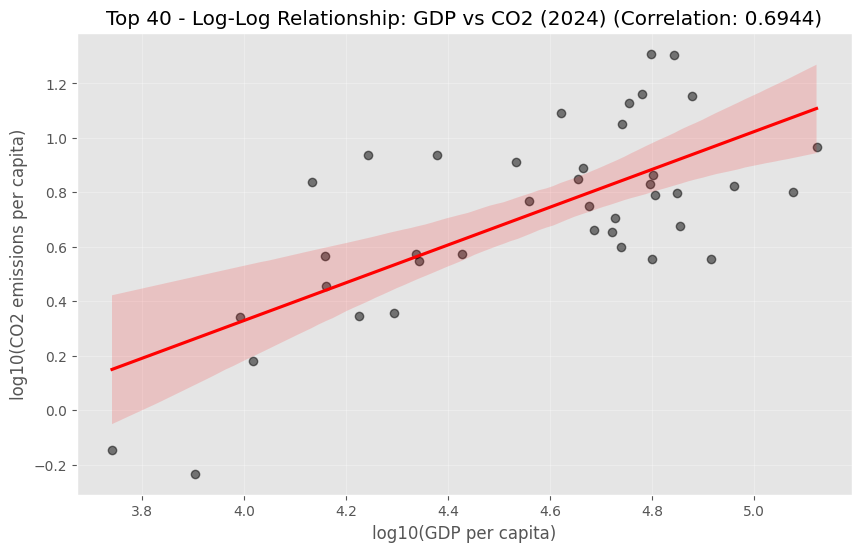

In [20]:
# Filter out zeros and NaNs to avoid errors with log transformation
df_log_top40 = df_gdp_co2_top40[(df_gdp_co2_top40['GDP per capita'] > 0) & 
                           (df_gdp_co2_top40['CO2 emissions per capita'] > 0)].copy()

df_log_top40['log_GDP_pc'] = np.log10(df_log_top40['GDP per capita'])
df_log_top40['log_CO2_pc'] = np.log10(df_log_top40['CO2 emissions per capita'])

pearson_coeff = df_log_top40['log_GDP_pc'].corr(df_log_top40['log_CO2_pc'])
print(f"Linear Correlation in Log-Log space: {pearson_coeff:.4f}")

plt.figure(figsize=(10, 6))
sns.regplot(data=df_log_top40, x='log_GDP_pc', y='log_CO2_pc', color='black',
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.title(f'Top 40 - Log-Log Relationship: GDP vs CO2 (2024) (Correlation: {pearson_coeff:.4f})')
plt.xlabel('log10(GDP per capita)')
plt.ylabel('log10(CO2 emissions per capita)')
plt.grid(True, alpha=0.3)
plt.savefig('../outputs/plots/gdp_vs_co2_loglog_top40_2024.png', dpi=300, bbox_inches='tight')
plt.show()

Although less evident, the linear regression using the log-log scale is still present among the 40 most powerful countries.

 ---
### 3.5 European countries Analysis
Below only the european countries are taken into account

In [21]:
eu_countries = [
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 
    'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 
    'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 
    'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 
    'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 
    'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 
    'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 
    'United Kingdom', 'Vatican City'
]

df_gdp_co2_europe = df_gdp_co2_merged[df_gdp_co2_merged['Country Name'].isin(eu_countries)]
df_gdp_co2_europe = df_gdp_co2_europe[df_gdp_co2_europe['Year'] == 2024]

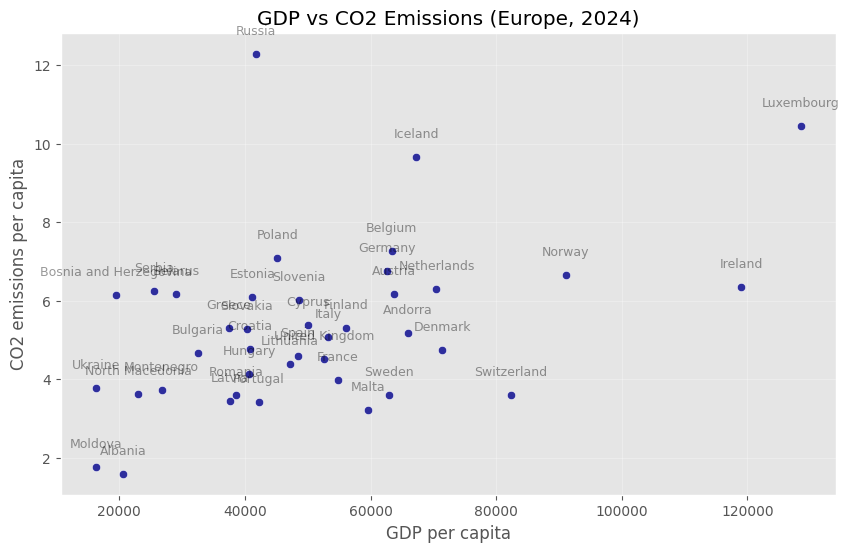

In [22]:
df_gdp_co2_europe_filtered = df_gdp_co2_europe[df_gdp_co2_europe['CO2 emissions per capita'] < 350]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_gdp_co2_europe_filtered, x='GDP per capita', 
                y='CO2 emissions per capita', alpha=0.8, color='darkblue')
for i in range(df_gdp_co2_europe_filtered.shape[0]):
    plt.text(x=df_gdp_co2_europe_filtered['GDP per capita'].iloc[i], 
             y=df_gdp_co2_europe_filtered['CO2 emissions per capita'].iloc[i] + 0.5, 
             s=df_gdp_co2_europe_filtered['Country Name'].iloc[i], 
             fontsize=9, 
             alpha=0.4,
             ha='center') 
plt.title('GDP vs CO2 Emissions (Europe, 2024)')
plt.xlabel('GDP per capita')
plt.ylabel('CO2 emissions per capita')
plt.grid(True, alpha=0.3)
plt.savefig('../outputs/plots/gdp_vs_co2_scatter_europe_2024.png', dpi=300, bbox_inches='tight')
plt.show()

Linear Correlation in Log-Log space: 0.4918


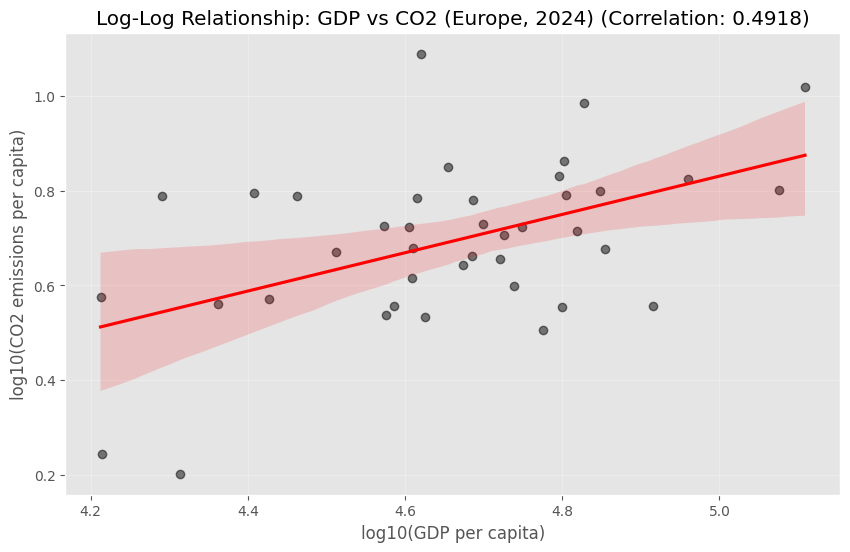

In [23]:
# Filter out zeros and NaNs to avoid errors with log transformation
df_log_europe = df_gdp_co2_europe_filtered[(df_gdp_co2_europe_filtered['GDP per capita'] > 0) & 
                           (df_gdp_co2_europe_filtered['CO2 emissions per capita'] > 0)].copy()

df_log_europe['log_GDP_pc'] = np.log10(df_log_europe['GDP per capita'])
df_log_europe['log_CO2_pc'] = np.log10(df_log_europe['CO2 emissions per capita'])

pearson_coeff = df_log_europe['log_GDP_pc'].corr(df_log_europe['log_CO2_pc'])
print(f"Linear Correlation in Log-Log space: {pearson_coeff:.4f}")

plt.figure(figsize=(10, 6))
sns.regplot(data=df_log_europe, x='log_GDP_pc', y='log_CO2_pc', color='black',
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.title(f'Log-Log Relationship: GDP vs CO2 (Europe, 2024) (Correlation: {pearson_coeff:.4f})')
plt.xlabel('log10(GDP per capita)')
plt.ylabel('log10(CO2 emissions per capita)')
plt.grid(True, alpha=0.3)
plt.savefig('../outputs/plots/gdp_vs_co2_loglog_europe_2024.png', dpi=300, bbox_inches='tight')
plt.show()

 ---
## 4. Data Saving
Saving the DataFrames into `..\data\final\`.
- `df_gdp_co2_merged` --> `..\data\final\gdp_and_co2_emissions_countries.csv`
- `df_gdp_co2_europe` --> `..\data\final\gdp_and_co2_emissions_europe.csv`
- `df_gdp_co2_top40` --> `..\data\final\gdp_and_co2_emissions_top40_2024.csv`

In [24]:
df_gdp_co2_merged.to_csv('../data/final/gdp_co2_emissions_countries.csv', index=False)
df_gdp_co2_europe.to_csv('../data/final/gdp_co2_emissions_europe.csv', index=False)
df_gdp_co2_top40.to_csv('../data/final/gdp_co2_emissions_top40_2024.csv', index=False)